In [30]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import _pickle as pickle

In [10]:
with open("data\profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Anush\AppData\Local\Temp\ipykernel_11192\1641180613.py:1: SyntaxWarning: invalid escape sequence '\p'
  with open("data\profiles.pkl",'rb') as fp:


In [11]:
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3


In [12]:
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    # stop words to ignore
    stops = stopwords.words('english')
    text = text.lower()
    text = text.replace('.', '')    
    text = text.split(' ')
    
    # lemmetizing
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text

In [13]:
df['Bios'] = df.Bios.apply(tokenize)

In [8]:
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,"[typical, twitter, fanatic, infuriatingly, humble, thinker, lifelong, coffee, practitioner, organizer]",5,3,4,1,3,6,7
1,"[web, junkie, analyst, infuriatingly, humble, introvert, food, nerd, lifelong, music, fanatic, coffee, lover]",7,9,5,1,9,4,0
2,"[avid, web, maven, food, practitioner, gamer, twitter, fanatic, pop, culture, scholar, zombie, evangelist]",1,2,6,5,6,5,4
3,"[twitteraholic, extreme, web, fanatic, food, buff, infuriatingly, humble, entrepreneur]",5,2,7,8,2,6,6
4,"[bacon, enthusiast, fall, lot, freelance, social, medium, fan, infuriatingly, humble, introvert]",6,6,6,4,3,6,3
...,...,...,...,...,...,...,...,...
6595,"[typical, pop, culture, nerd, infuriatingly, humble, internet, maven, alcohol, evangelist]",7,9,0,0,2,2,4
6596,"[avid, web, junkie, lifelong, alcohol, guru, hardcore, reader, award-winning, twitter, evangelist]",4,3,6,3,7,7,2
6597,"[music, ninja, bacon, fanatic, reader, total, communicator, unapologetic, beer, specialist]",1,4,0,4,9,2,5
6598,"[communicator, bacon, lover, award-winning, introvert, amateur, internet, ninja]",6,2,0,3,8,9,1


## Analysis

In [14]:
# creating vocabulary of unique words
total_vocab = set()
for bio in df['Bios']:
    total_vocab.update(bio)

print("Number of unique words: ",len(total_vocab))


Number of unique words:  104


In [39]:
# most frequent
words = []
for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)


[('fanatic', 2241),
 ('travel', 1737),
 ('music', 1681),
 ('food', 1657),
 ('social', 1654),
 ('zombie', 1652),
 ('pop', 1645),
 ('tv', 1636),
 ('twitter', 1622),
 ('coffee', 1617),
 ('web', 1612),
 ('beer', 1605),
 ('bacon', 1585),
 ('medium', 1577),
 ('alcohol', 1574),
 ('culture', 1572),
 ('internet', 1534),
 ('expert', 1183),
 ('geek', 1165),
 ('buff', 1164),
 ('lover', 1159),
 ('guru', 1158),
 ('fan', 1157),
 ('ninja', 1143),
 ('scholar', 1142),
 ('trailblazer', 1138),
 ('maven', 1137),
 ('junkie', 1134),
 ('specialist', 1119),
 ('advocate', 1116),
 ('enthusiast', 1108),
 ('practitioner', 1105),
 ('nerd', 1101),
 ('aficionado', 1099),
 ('evangelist', 1092),
 ('introvert', 861),
 ('gamer', 853),
 ('reader', 850),
 ('communicator', 829),
 ('writer', 815),
 ('creator', 815),
 ('student', 808),
 ('explorer', 806),
 ('thinker', 805),
 ('analyst', 804),
 ('certified', 793),
 ('troublemaker', 787),
 ('general', 786),
 ('organizer', 781),
 ('problem', 770),
 ('solver', 770),
 ('devoted', 

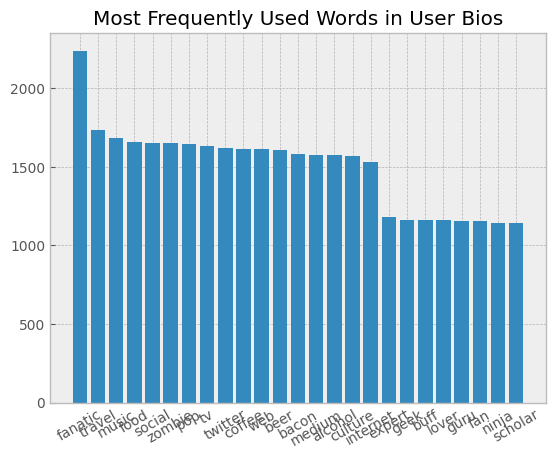

In [40]:
# plt.style.use('ggplot')
# plt.figure(figsize=(15,5))
freq_words, counts = zip(*bio_freq.most_common(25))

plt.bar(freq_words, counts)
plt.xticks(rotation=30)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

In [43]:
# finding and ranking bigrams
bigram_meas = BigramAssocMeasures()
bio_finder = BigramCollocationFinder.from_words(words)
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)
bio_scored[:25]


[(('social', 'medium'), 0.019017184202592706),
 (('pop', 'culture'), 0.018956888754899006),
 (('problem', 'solver'), 0.009285498944829666),
 (('subtly', 'charming'), 0.008525776303889057),
 (('infuriatingly', 'humble'), 0.00763340367802231),
 (('future', 'teen'), 0.002568586071751583),
 (('teen', 'idol'), 0.002568586071751583),
 (('fit', 'apathy'), 0.0025082906240578838),
 (('prone', 'fit'), 0.0025082906240578838),
 (('fall', 'lot'), 0.002496231534519144),
 (('animal', 'everywhere'), 0.002411817907747965),
 (('friend', 'animal'), 0.002411817907747965),
 (('music', 'fanatic'), 0.0022309315646668678),
 (('zombie', 'fanatic'), 0.002206813385589388),
 (('travel', 'fanatic'), 0.002194754296050648),
 (('medium', 'fanatic'), 0.0021103406692794696),
 (('boxing', 'glove'), 0.0020982815797407294),
 (('type', 'boxing'), 0.0020982815797407294),
 (('unable', 'type'), 0.0020982815797407294),
 (('food', 'fanatic'), 0.001989749773892071),
 (('internet', 'fanatic'), 0.001977690684353331),
 (('culture',

In [49]:
zip(*bigrams[:5])

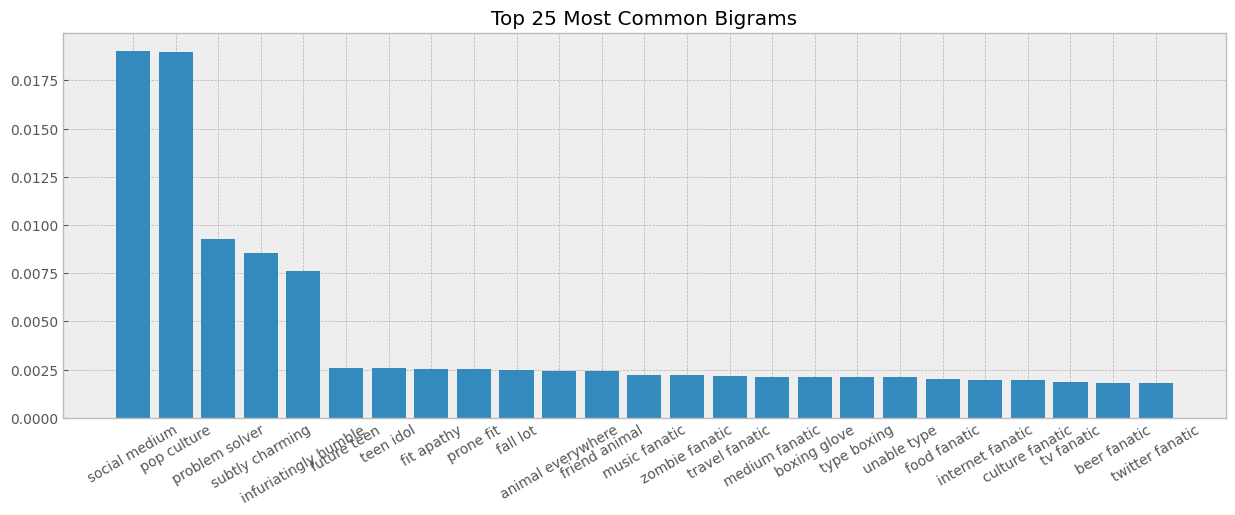

In [52]:
bg, bio_scores = zip(*[(f"{w1} {w2}", score) for (w1, w2), score in bio_scored[:50]])
bigrams = list(zip(bg, bio_scores))

plt.style.use('bmh')
plt.figure(figsize=(15,5))
plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=30)
plt.title('Top 25 Most Common Bigrams')
plt.show()